In [1]:
import importlib
import all_funcs
importlib.reload(all_funcs)
from all_funcs import *

In [5]:
df_events_all_wavelets_005_DNA = unpickle("df_events_all_wavelets_005_DNA.pkl")
df_all_wavelets_005_DNA = unpickle("df_all_wavelets_005_DNA.pkl")
df_events_all_wavelets_01_DNA = unpickle("df_events_all_wavelets_01_DNA2.pkl")
df_all_wavelets_01_DNA = unpickle("df_all_wavelets_01_DNA2.pkl")
df_events_all_wavelets_015_DNA = unpickle("df_events_all_wavelets_015_DNA.pkl")
df_all_wavelets_015_DNA = unpickle("df_all_wavelets_015_DNA.pkl")
df_events_all_wavelets_02_DNA = unpickle("df_events_all_wavelets_02_DNA2.pkl")
df_all_wavelets_02_DNA = unpickle("df_all_wavelets_02_DNA2.pkl")
df_events_all_wavelets_025_DNA = unpickle("df_events_all_wavelets_025_DNA.pkl")
df_all_wavelets_025_DNA = unpickle("df_all_wavelets_025_DNA.pkl")
df_events_all_wavelets_03_DNA = unpickle("df_events_all_wavelets_03_DNA.pkl")
df_all_wavelets_03_DNA = unpickle("df_all_wavelets_03_DNA.pkl")
df_events_all_wavelets_035_DNA = unpickle("df_events_all_wavelets_035_DNA.pkl")
df_all_wavelets_035_DNA = unpickle("df_all_wavelets_035_DNA.pkl")


In [108]:
df_events_all_wavelets_04_DNA = unpickle("df_events_all_wavelets_04_DNA.pkl")
df_all_wavelets_04_DNA = unpickle("df_all_wavelets_04_DNA.pkl")

df_events_all_wavelets_045_DNA = unpickle("df_events_all_wavelets_045_DNA.pkl")
df_all_wavelets_045_DNA = unpickle("df_all_wavelets_045_DNA.pkl")
df_events_all_wavelets_05_DNA = unpickle("df_events_all_wavelets_05_DNA.pkl")
df_all_wavelets_05_DNA = unpickle("df_all_wavelets_05_DNA.pkl")



no DWT event data

In [2]:
time_list = unpickle("10kb_time_list.pkl")
count_list = unpickle("10kb_counts_list.pkl")

In [3]:
time_list_padded, count_list_padded = pad_event(time_list, count_list, 0, custom_length=501)

$$Metric = \beta \times RMSE + \gamma \times smoothness$$

In [8]:
def apply_RMSE(df, thresh):
    RMSE_dic = {}
    for col in df.columns:
        rmse_sum = 0
        for i in range(len(df[col][1])):  # Adjust the range as needed
            # Directly use the sequences without adding a time index
            sequence1 = np.array(count_list_padded[i])
            sequence2 = np.array(df[col][1][i])
            
            # Calculate Euclidean distance for the sequences
            rmse = np.sqrt(np.mean((sequence1 - sequence2)**2))
            rmse_sum += rmse
        
        # Store the average Euclidean distance for the column
        RMSE_dic[col] = rmse_sum / len(df[col][1])  # Use the actual number of sequences compared
        
    return pd.DataFrame(RMSE_dic, index=[f"thresh_{thresh}"]).T

In [ ]:
rmse_df_005 = apply_RMSE(df_events_all_wavelets_005_DNA, "005")
rmse_df_01 = apply_RMSE(df_events_all_wavelets_01_DNA, "01")
rmse_df_015 = apply_RMSE(df_events_all_wavelets_015_DNA, "015")
rmse_df_02 = apply_RMSE(df_events_all_wavelets_02_DNA, "02")
rmse_df_025 = apply_RMSE(df_events_all_wavelets_025_DNA, "025")
rmse_df_03 = apply_RMSE(df_events_all_wavelets_03_DNA, "03")



In [109]:
rmse_df_035 = apply_RMSE(df_events_all_wavelets_035_DNA, "035")
rmse_df_04 = apply_RMSE(df_events_all_wavelets_04_DNA, "04")
rmse_df_045 = apply_RMSE(df_events_all_wavelets_045_DNA, "045")
rmse_df_05 = apply_RMSE(df_events_all_wavelets_05_DNA, "05")

In [110]:
#rmse_df_all = pd.concat([rmse_df_005, rmse_df_01, rmse_df_015, rmse_df_02, rmse_df_025, rmse_df_03, rmse_df_035, rmse_df_04, rmse_df_045, rmse_df_05], axis = 1)
rmse_df_all = pd.concat([rmse_df_005, rmse_df_01, rmse_df_015, rmse_df_02, rmse_df_025, rmse_df_03, rmse_df_035, rmse_df_04, rmse_df_045, rmse_df_05], axis = 1)


Smoothness

In [92]:
def smoothness(df, thresh):
    smoothness_dic = {}
    for col in df.columns:
        sum_sum = 0
        for i in range(100,200):
            smooth = count_list_padded[i] - df[col][1][i]
            sum_sum += np.std(smooth)
            
        smoothness_dic[col] = sum_sum / 100
            
    return pd.DataFrame(smoothness_dic, index = [f"thresh_{thresh}"]).T

In [ ]:
smoothness_005 = smoothness(df_events_all_wavelets_005_DNA, "005")
smoothness_01 = smoothness(df_events_all_wavelets_01_DNA, "01")
smoothness_015 = smoothness(df_events_all_wavelets_015_DNA, "015")
smoothness_02 = smoothness(df_events_all_wavelets_02_DNA, "02")
smoothness_025 = smoothness(df_events_all_wavelets_025_DNA, "025")
smoothness_03 = smoothness(df_events_all_wavelets_03_DNA, "03")


In [111]:
smoothness_035 = smoothness(df_events_all_wavelets_035_DNA, "035")
smoothness_04 = smoothness(df_events_all_wavelets_04_DNA, "04")
smoothness_045 = smoothness(df_events_all_wavelets_045_DNA, "045")
smoothness_05 = smoothness(df_events_all_wavelets_05_DNA, "05")


In [112]:
#smoothness_all = pd.concat([smoothness_005, smoothness_01, smoothness_015, smoothness_02, smoothness_025, smoothness_03, smoothness_035, smoothness_04, smoothness_045, smoothness_05], axis = 1)
smoothness_all = pd.concat([smoothness_005, smoothness_01, smoothness_015, smoothness_02, smoothness_025, smoothness_03, smoothness_035, smoothness_04, smoothness_045, smoothness_05], axis = 1)


Metric

In [95]:
def metric(rmse_df_all, smoothness_all, a, b):
    # alpha controls weighting towards accuracy
    metric_df = pd.DataFrame()
    for col in rmse_df_all.columns:

        metric_df[col] = a * rmse_df_all[col] + b * smoothness_all[col]
    return metric_df


In [96]:
def normalize_dataframe(df, new_min=0, new_max=1):
    # Apply Min-Max normalization
    normalized_df = (df - df.min()) / (df.max() - df.min()) * (new_max - new_min) + new_min
    return normalized_df


In [113]:
rmse_df_normalised = normalize_dataframe(rmse_df_all)
smoothness_all_normalised = 1 - normalize_dataframe(smoothness_all)

In [131]:
import torch

rmse_df_norm_torch = torch.tensor(rmse_df_normalised.values, dtype=torch.float32)
smoothness_all_norm_torch = torch.tensor(smoothness_all_normalised.values, dtype=torch.float32)
target_value_torch = torch.tensor([0], dtype=torch.float32)
# Assume tensor conversions are done correctly outside this snippet
weights = torch.tensor([0.5], requires_grad=True)
alpha = 0.1 # Learning rate
iterations = 5000  # Number of iterations

optimizer = torch.optim.SGD([weights], lr=alpha)

def objective_function(weights, rmse, smoothness):
    alpha = weights[0]
    beta = 1 - alpha  # sum to 1

    metric = alpha * rmse + beta * smoothness
    mse = metric.mean() 

    # Universal lower bound for all coefficients
    lower_bound = 0.05

    # Specific upper bounds
    alpha_upper_bound = 1
    beta_upper_bound = 1

    # Apply penalties for weights out of bounds
    # Penalties for being below the lower bound
    lower_bounds_penalty = torch.clamp(0.05 - alpha, min=0) + \
                           torch.clamp(0.05 - beta, min=0)
                           
    # Penalties for exceeding the upper bounds
    alpha_penalty = torch.clamp(alpha - alpha_upper_bound, min=0)
    beta_penalty = torch.clamp(beta - beta_upper_bound, min=0)

    # Adjust penalty strength as necessary
    penalty_strength = 5
    penalty = penalty_strength * (lower_bounds_penalty + alpha_penalty + beta_penalty)

    return mse + penalty




# Optimization loop
for _ in range(iterations):
    optimizer.zero_grad()
    loss = objective_function(weights, rmse_df_norm_torch, smoothness_all_norm_torch)
    loss.backward()
    optimizer.step()

beta = 1 - weights.detach().numpy()[0]
print("Optimal weights:", weights.detach().numpy(), beta)


Optimal weights: [0.3123] 0.6877312660217285


In [132]:
1 - 0.3123

0.6877

In [119]:
metric_df_all = metric(rmse_df_normalised, smoothness_all_normalised,0.3123, 0.6877378821372986)
metric_df_all.min().min(), metric_df_all.idxmin(), metric_df_all.min().idxmax , metric_df_all.min().idxmin()

(0.0004100272891708022,
 thresh_005    bior3.7
 thresh_01     bior3.5
 thresh_015    bior3.5
 thresh_02     bior2.2
 thresh_025    bior2.2
 thresh_03        sym2
 thresh_035       sym2
 thresh_04        sym2
 thresh_045       sym2
 thresh_05        sym2
 dtype: object,
 <bound method Series.idxmax of thresh_005    0.002254
 thresh_01     0.001324
 thresh_015    0.003450
 thresh_02     0.000410
 thresh_025    0.001314
 thresh_03     0.001437
 thresh_035    0.001730
 thresh_04     0.001154
 thresh_045    0.000649
 thresh_05     0.000416
 dtype: float64>,
 'thresh_02')

In [24]:
metric_df_all = metric(rmse_df_normalised, smoothness_all_normalised,0.5196, 0.4804387092590332)
metric_df_all.min().min(), metric_df_all.idxmin(), metric_df_all.min().idxmax , metric_df_all.min().idxmin()

(0.0006821971804455612,
 thresh_005    bior3.7
 thresh_015    bior3.3
 thresh_02     bior2.2
 thresh_025       sym2
 thresh_03        sym2
 dtype: object,
 <bound method Series.idxmax of thresh_005    0.001630
 thresh_015    0.002556
 thresh_02     0.000682
 thresh_025    0.001691
 thresh_03     0.001097
 dtype: float64>,
 'thresh_02')

### Event

In [66]:
df_events_all_wavelets_02_DNA["bior2.2"]

event_time_padded    [[1.5718679999999883, 1.5718719999999884, 1.57...
DWT_rec_padded       [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: bior2.2, dtype: object

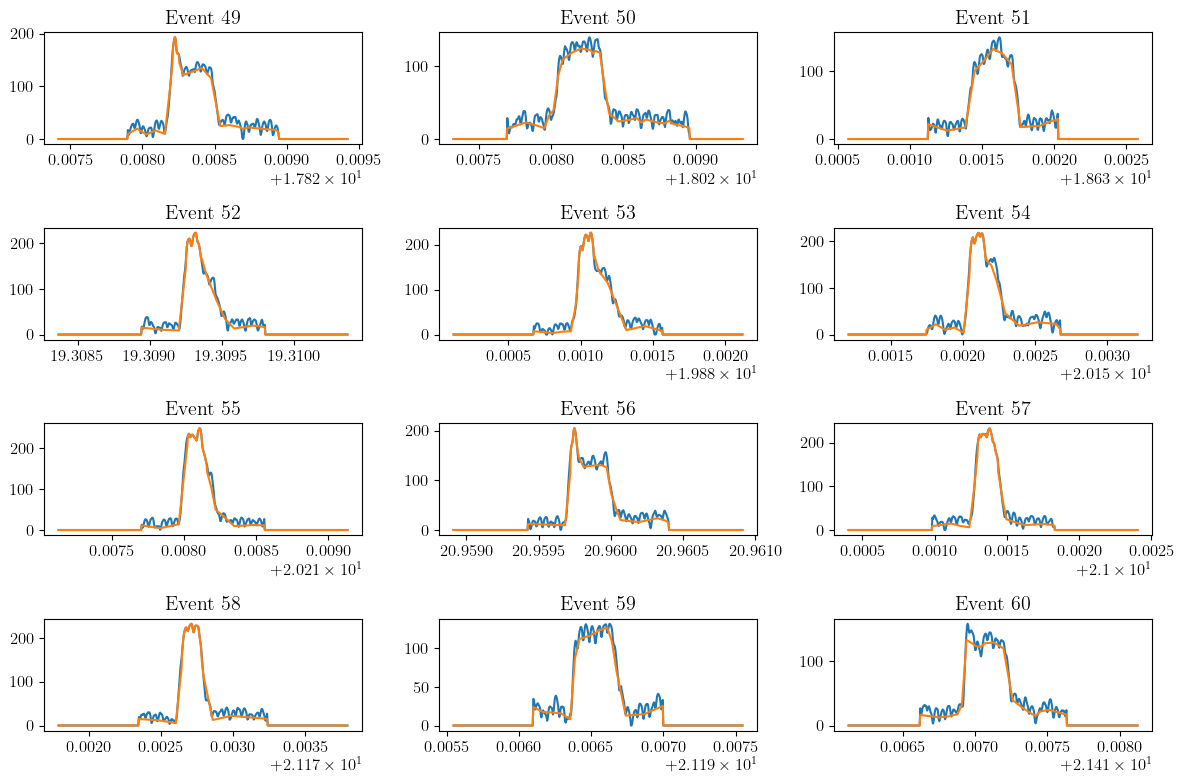

In [84]:
fig, axs = plt.subplots(4, 3, figsize=(12, 8))
axs = axs.flatten()

for i, ax in zip(range(48,60), axs):

    ax.plot(time_list_padded[i], count_list_padded[i])
    ax.plot(time_list_padded[i], df_events_all_wavelets_02_DNA["bior2.2"][1][i])
    
    if i in [0, 3, 6, 9]:
        ax.set_ylabel('Current (pA)')
    if i in [9, 10, 11]:
        ax.set_xlabel('Time (s)')
    ax.set_title(f'Event {i+1}')
    #ax.set_ylim(-100, 120)
    #ax.set_ylim(-30, 60)

plt.tight_layout()
plt.show()

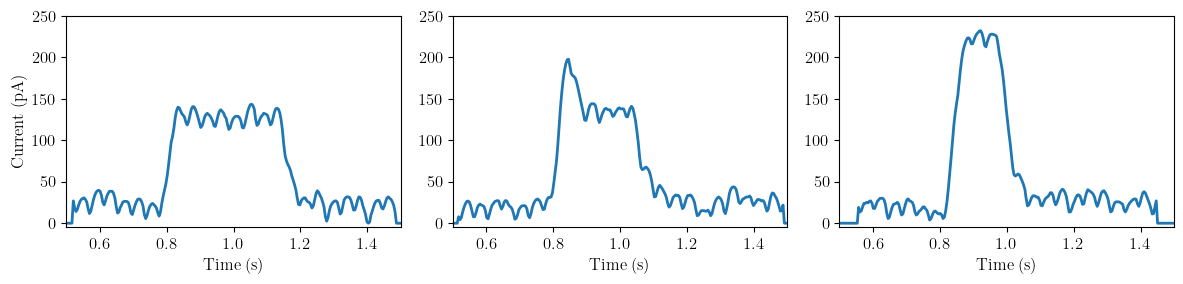

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs = axs.flatten()


indices = [10, 21, 57]

for i, ax in zip(indices, axs):
    t = np.linspace(0, len(time_list_padded[i]) * 4e-3, len(time_list_padded[i]))

    ax.plot(t, count_list_padded[i], linewidth = 2)
    #ax.plot(time_list_padded[i], df_events_all_wavelets_02_DNA["bior2.2"][1][i])
    
    if i == 10:
        ax.set_ylabel('Current (pA)')

    ax.set_xlabel('Time (s)')
    ax.set_ylim(-5, 250)
    ax.set_xlim(0.5, 1.5)
    #ax.set_ylim(-30, 60)

plt.tight_layout()
#plt.savefig("/Users/joehart/Desktop/chemistry/Year 4/MSci project/Python_nanopores/MSci_python_images/DNA_event_examples_raw.png", dpi = 500)
plt.show()

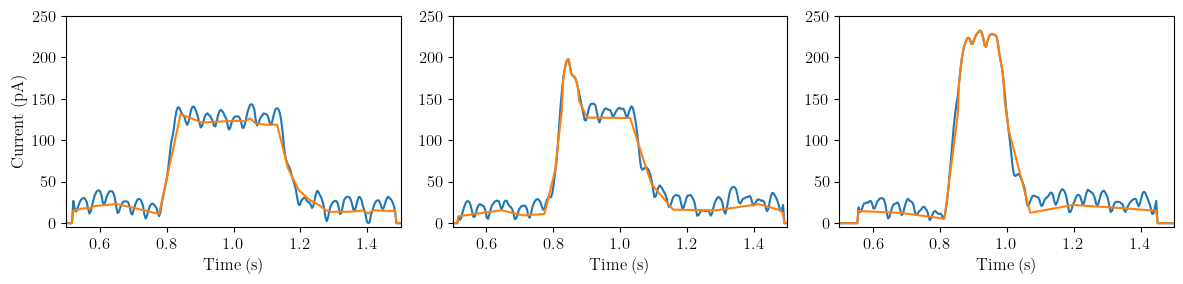

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs = axs.flatten()


indices = [10, 21, 57]

for i, ax in zip(indices, axs):
    t = np.linspace(0, len(time_list_padded[i]) * 4e-3, len(time_list_padded[i]))

    ax.plot(t, count_list_padded[i])
    ax.plot(t, df_events_all_wavelets_02_DNA["bior2.2"][1][i])
    
    if i == 10:
        ax.set_ylabel('Current (pA)')

    ax.set_xlabel('Time (s)')
    ax.set_ylim(-5, 250)
    ax.set_xlim(0.5, 1.5)
    #ax.set_ylim(-30, 60)

plt.tight_layout()
#plt.savefig("MSci_python_images/DNA_bior22_event_examples.png", dpi = 300)
plt.show()


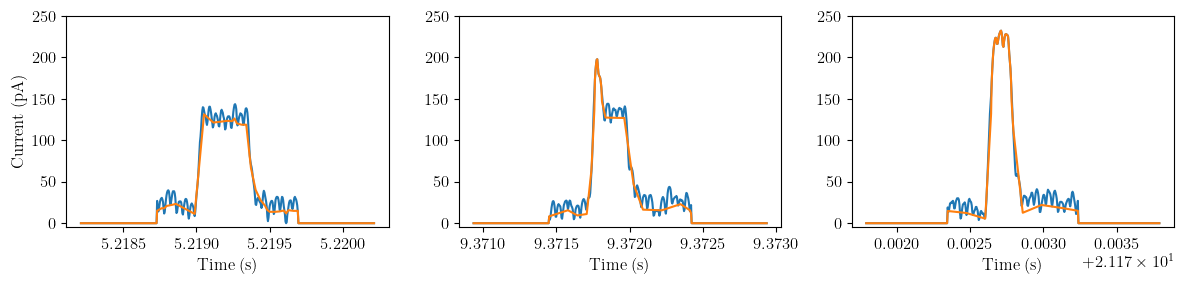

In [88]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
axs = axs.flatten()

indices = [10, 21, 57]

for i, ax in zip(indices, axs):

    ax.plot(time_list_padded[i], count_list_padded[i])
    ax.plot(time_list_padded[i], df_events_all_wavelets_02_DNA["bior2.2"][1][i])
    
    if i == 10:
        ax.set_ylabel('Current (pA)')

    ax.set_xlabel('Time (s)')
    ax.set_ylim(-5, 250)
    #ax.set_ylim(-30, 60)

plt.tight_layout()
#plt.savefig("MSci_python_images/DNA_bior22_event_examples.png", dpi = 300)
plt.show()

Text(0.5, 0, 'Time (s)')

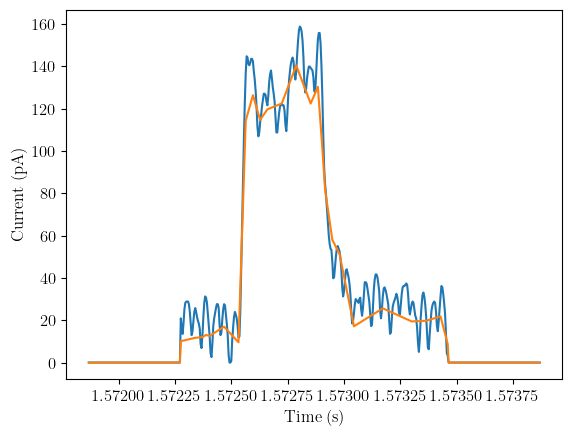

In [72]:
plt.plot(time_list_padded[0], count_list_padded[0])
plt.plot(time_list_padded[0], df_events_all_wavelets_02_DNA["bior2.2"][1][0])
plt.ylabel('Current (pA)')
plt.xlabel('Time (s)')